In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [53]:
sns.set_context("notebook")
sns.set_style("dark")

In [54]:
with open("example-received-data.json", "rb") as f:
    old_raw_data = json.load(f)

## Loading raw data from analytics system

In [55]:
raw_data = []

for el in old_raw_data["data"]:
    # Value
    if "value" in el:
        el["value"] = float(el["value"])

    # Classes
    if "il" in el and "if" in el:
        el["i-faction-class"] = el["if"] + "-" + el["il"]
    if "tl" in el and "tf" in el:
        el["t-faction-class"] = el["tf"] + "-" + el["tl"]

    # Instigator coords
    if "ic" in el:
        el["ic_x"] = float(el["ic"].split(" ")[0].split("=")[1])
    if "ic" in el:
        el["ic_y"] = float(el["ic"].split(" ")[1].split("=")[1])

    # Target coords
    if "tc" in el:
        el["tc_x"] = float(el["tc"].split(" ")[0].split("=")[1])
    if "tc" in el:
        el["tc_y"] = float(el["tc"].split(" ")[1].split("=")[1])

    raw_data.append(el)

## Analyzing damage (per pawn, per class)

In [56]:
damage_df = pd.DataFrame([el for el in raw_data if el["Type"] == "Damage"])

In [57]:
damage_df

,value,i,t,ips,tps,il,tl,if,tf,ic,tc,Type,i-faction-class,t-faction-class,ic_x,ic_y,tc_x,tc_y
0,33.75000,CH_13,CH_0,PS_13,PS_2,TacS,MelV,CSM,CSM,X=1262.362 Y=1106.101 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1262.362,1106.101,721.161,3052.662
1,33.75000,CH_1,CH_0,PS_0,PS_2,TacS,MelV,CSM,CSM,X=1253.549 Y=1144.859 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1253.549,1144.859,721.161,3052.662
2,33.75000,CH_1,CH_0,PS_0,PS_2,TacS,MelV,CSM,CSM,X=1253.549 Y=1144.859 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1253.549,1144.859,721.161,3052.662
3,33.75000,CH_1,CH_0,PS_0,PS_2,TacS,MelV,CSM,CSM,X=1253.549 Y=1144.859 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1253.549,1144.859,721.161,3052.662
4,33.75000,CH_1,CH_0,PS_0,PS_2,TacS,MelV,CSM,CSM,X=1253.549 Y=1144.859 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1253.549,1144.859,721.161,3052.662
5,33.75000,CH_1,CH_0,PS_0,PS_2,TacS,MelV,CSM,CSM,X=1253.549 Y=1144.859 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1253.549,1144.859,721.161,3052.662
6,25.00000,CH_1,CH_0,PS_0,PS_2,TacS,MelV,CSM,CSM,X=1230.107 Y=1139.716 Z=97.213,X=721.161 Y=3052.662 Z=97.213,Damage,CSM-TacS,CSM-MelV,1230.107,1139.716,721.161,3052.662
7,20.50001,CH_1,CH_1,PS_0,PS_0,TacV,TacS,LSM,CSM,X=1204.501 Y=1082.761 Z=97.213,X=1204.501 Y=1082.761 Z=97.213,Damage,LSM-TacV,CSM-TacS,1204.501,1082.761,1204.501,1082.761
8,20.50001,CH_1,CH_1,PS_0,PS_0,TacS,TacS,CSM,CSM,X=1367.722 Y=912.229 Z=97.213,X=1367.722 Y=912.229 Z=97.213,Damage,CSM-TacS,CSM-TacS,1367.722,912.229,1367.722,912.229


In [58]:
# damage_df["value"] = pd.to_numeric(damage_df["value"])
damage_per_pawn = damage_df.groupby(["i"]).agg(
    damage_per_life=('value', 'sum'),
    loadout=('i-faction-class', 'first')
)
damage_per_pawn

,damage_per_life,loadout
i,,
CH_1,234.75002,CSM-TacS
CH_13,33.75000,CSM-TacS


In [59]:
damage_per_life_for_classes = damage_per_pawn.groupby("loadout").agg(
    mean_damage_per_life=('damage_per_life', 'mean'),
    std_damage_per_life=('damage_per_life', 'std')
)
damage_per_life_for_classes

,mean_damage_per_life,std_damage_per_life
loadout,,
CSM-TacS,134.25001,142.128477


<Axes: title={'center': 'damage_per_life'}, xlabel='[loadout]'>

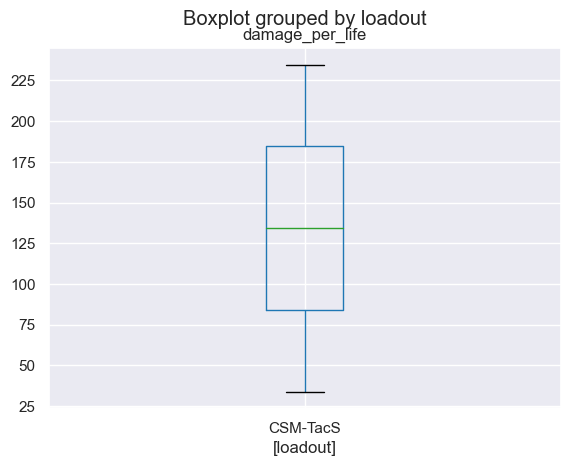

In [60]:
damage_per_pawn.boxplot(by="loadout")
# sns.violinplot(damage_per_pawn, y="damage_per_life", x="loadout")

## Analyzing XP (per pawn, per class and action)

In [61]:
xp_df = pd.DataFrame([el for el in raw_data if el["Type"] == "XP"])
xp_df

,t,value,tps,tf,tl,tc,action,Type,t-faction-class,tc_x,tc_y
0,CH_1,-17.0,PS_0,CSM,TacS,X=1262.362 Y=1106.101 Z=97.213,Friendly fire 2,XP,CSM-TacS,1262.362,1106.101
1,CH_1,-17.0,PS_0,LSM,TacV,X=1262.362 Y=1106.101 Z=97.213,Friendly fire,XP,LSM-TacV,1262.362,1106.101
2,CH_1,-17.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Friendly fire,XP,CSM-TacS,1253.549,1144.859
3,CH_1,-17.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Friendly fire,XP,CSM-TacS,1253.549,1144.859
4,CH_1,-17.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Friendly fire,XP,CSM-TacS,1253.549,1144.859
5,CH_1,-17.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Friendly fire,XP,CSM-TacS,1253.549,1144.859
6,CH_1,100.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Enemy down,XP,CSM-TacS,1253.549,1144.859
7,CH_1,100.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Enemy down,XP,CSM-TacS,1253.549,1144.859
8,CH_1,-13.0,PS_0,CSM,TacS,X=1230.107 Y=1139.716 Z=97.213,Friendly fire,XP,CSM-TacS,1230.107,1139.716


In [62]:
xp_per_pawn = xp_df.groupby(["t", "action"]).agg(
    xp_per_life=('value', 'sum'),
    loadout=('t-faction-class', 'first')
)

In [63]:
xp_per_pawn

xp_per_life   loadout
t    action                                
CH_1 Enemy down             200.0  CSM-TacS
     Friendly fire          -98.0  LSM-TacV
     Friendly fire 2        -17.0  CSM-TacS

In [64]:
xp_per_life_for_class_and_action = xp_per_pawn.groupby(["loadout", "action"]).agg(
    mean_xp_per_life=('xp_per_life', 'mean'),
    std_xp_per_life=('xp_per_life', 'std')
)
xp_per_life_for_class_and_action

mean_xp_per_life  std_xp_per_life
loadout  action                                            
CSM-TacS Enemy down                  200.0              NaN
         Friendly fire 2             -17.0              NaN
LSM-TacV Friendly fire               -98.0              NaN

<Axes: title={'center': 'xp_per_life'}, xlabel='[loadout]'>

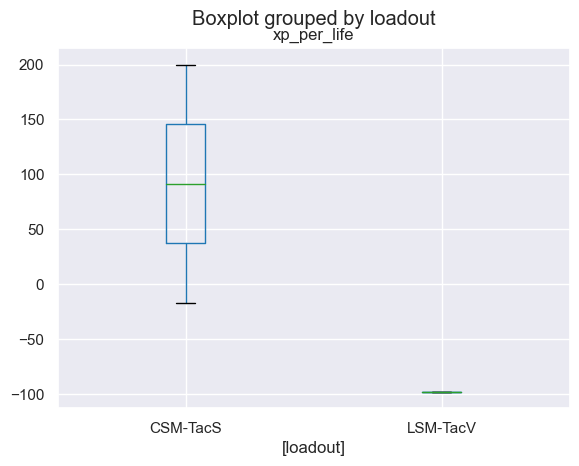

In [65]:
xp_per_pawn.boxplot(by='loadout')

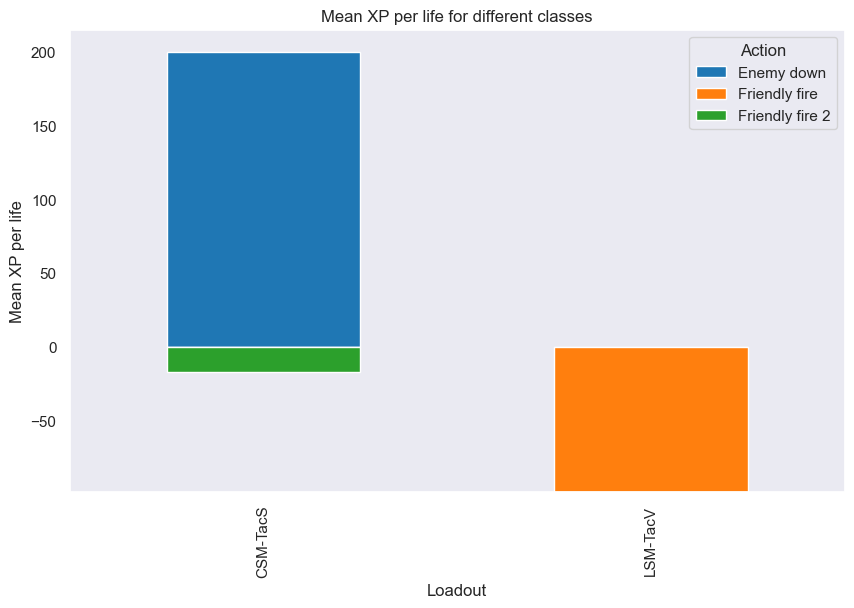

In [66]:
# Create a pivot table to reshape the data for plotting

pivot_xp_per_life_for_class_and_action = xp_per_life_for_class_and_action.reset_index()
pivot_xp_per_life_for_class_and_action = pivot_xp_per_life_for_class_and_action.pivot(index='loadout', columns='action', values='mean_xp_per_life')

# Create a stacked barplot
ax = pivot_xp_per_life_for_class_and_action.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Mean XP per life for different classes')
plt.xlabel('Loadout')
plt.ylabel('Mean XP per life')
plt.legend(title='Action')

# Show the plot
plt.show()

## Analyzing KD ratios

In [70]:
kills_df = xp_df[xp_df["action"] == "Enemy down"]
kills_df

,t,value,tps,tf,tl,tc,action,Type,t-faction-class,tc_x,tc_y
6,CH_1,100.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Enemy down,XP,CSM-TacS,1253.549,1144.859
7,CH_1,100.0,PS_0,CSM,TacS,X=1253.549 Y=1144.859 Z=97.213,Enemy down,XP,CSM-TacS,1253.549,1144.859


In [78]:
kills_per_pawn = kills_df.groupby(["t"]).agg(
    kill_count=('t', 'count'),
    loadout=('t-faction-class', 'first')
)
kills_per_pawn

,kill_count,loadout
t,,
CH_1,2,CSM-TacS


In [79]:
kills_per_life_for_classes = kills_per_pawn.groupby("loadout").agg(
    mean_kills_per_life=('kill_count', 'mean'),
    std_kills_per_life=('kill_count', 'std')
)
kills_per_life_for_classes

,mean_kills_per_life,std_kills_per_life
loadout,,
CSM-TacS,2.0,NaN


<Axes: title={'center': 'kill_count'}, xlabel='[loadout]'>

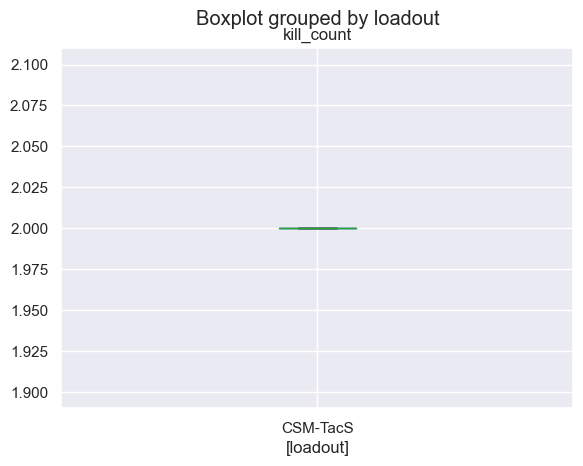

In [80]:
kills_per_pawn.boxplot(by="loadout")
# sns.violinplot(kills_per_pawn, y="count", x="loadout")

## Analyzing class frequencies

In [81]:
spawn_df = pd.DataFrame([el for el in raw_data if el["Type"] == "Spawn"])

In [82]:
class_spawns = spawn_df["t-faction-class"].value_counts()

In [83]:
class_spawns

t-faction-class
CSM-TacS    2
LSM-TacV    1
Name: count, dtype: int64

<Axes: title={'center': 'Classes spawn frequency'}, xlabel='t-faction-class'>

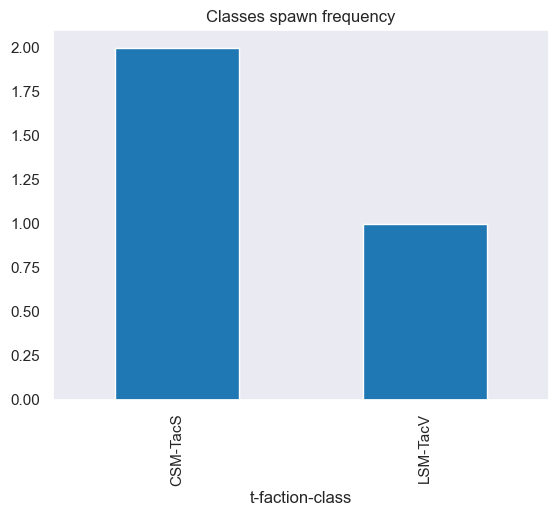

In [84]:
class_spawns.plot(kind='bar', title="Classes spawn frequency")

## Heatmaps

### Damage dealers

In [85]:
x_points = list(damage_df["ic_x"])
y_points = list(damage_df["ic_y"])

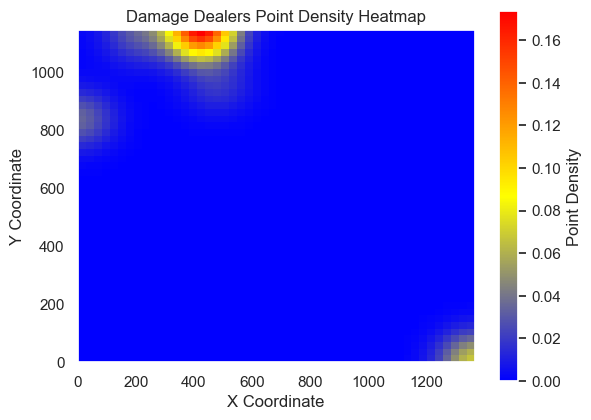

In [86]:
from matplotlib.colors import LinearSegmentedColormap

# Create a 2D histogram to represent point density
heatmap, xedges, yedges = np.histogram2d(x_points, y_points, bins=50)

# Smooth the heatmap using Gaussian convolution
from scipy.ndimage import gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=3)

# Define a custom colormap (blue, yellow, red)
colors = [(0, 'blue'), (0.5, 'yellow'), (1, 'red')]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

# Create the heatmap plot
plt.imshow(heatmap.T, origin='lower', extent=[0, xedges.max(), 0, yedges.max()], cmap=custom_cmap)
plt.colorbar(label='Point Density')  # Add a colorbar for reference
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Damage Dealers Point Density Heatmap')

plt.show()